<img src='./img/logo_header.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='100%'></img>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./61_CEMS_GEFF_FWI_data_overview.ipynb"><< 61 - CEMS GEFF FWI data overview </a><span style="float:right;"><a href="./63_CEMS_GEFF_FWI_custom_danger_classes.ipynb">63 - CEMS GEFF FWI custom danger classes >></a></span>

<br>

# 6.2 CEMS GEFF FWI harmonized danger classes
# Global ECMWF Fire Forecasting

###  Example Portugal fires in July 2020

## Harmonized danger classes

According to EFFIS [documentation and user guidelines](https://effis.jrc.ec.europa.eu/about-effis/technical-background/fire-danger-forecast/):

- In most European countries, the core of the wildfire season starts on 1st of March and ends on 31st of October.
- The EFFIS network adopts the Canadian Forest Fire Weather Index (FWI) System as the method to assess the fire danger level in a harmonized way throughout Europe.
  
**European** Fire Danger Classes (FWI ranges, upper bound excluded):
  - Very low = 0 - 5.2
  - Low = 5.2 - 11.2 
  - Moderate = 11.2 - 21.3 
  - High = 21.3 - 38.0 
  - Very high = 38.0 - 50.0 
  - Extreme > 50.0

In ECMWF experience, the above thresholds are particularly suited to assess fire danger in southern Europe, e.g. in the Mediterranean Region. Some countries, tend to calibrate these thresholds depending on local vegetation characteristics and fire regimes. This require local knowledge and/or experimentation.
For instance, **Portugal** uses the following thresholds for local-level assessments of fire danger: 
  - Reduced risk = 8.4,
  - Moderate risk = 17.2,
  - High risk = 24.6,
  - Maximum risk = 38.3

Northern European countries might be more inclined to test **Canadian** threshold levels for the purpose of local-level assessments of fire danger:
  - Very Low = 0 - 1,
  - Low = 2 - 4,
  - Moderate = 5 - 8,
  - High = 9 - 16,
  - VeryHigh = 17 - 30,
  - Extreme > 30
  
As another example, in **Indonesia** threshold levels are (probably due to high level of humidity):
  - Very Low = 0 - 3,
  - Low = 3 - 5,
  - Moderate = 5 - 10,
  - High = 10 - 17,
  - VeryHigh = 17 - 28,
  - Extreme > 28

## Classified forecasts

Raw FWI forecast values are expressed as a continuous rating in the range [0, +Inf[ (very rarely above 100). In order to aid decision makers raw forecasts are routinely converted into danger classes, based on the thresholds mentioned above, before being displayed by the EFFIS/GWIS viewer.

In this tutorial we are going to look at the predictive capability of the fire danger forecasts. Let us use the forecast issued on 16th July to see whether dangerous fire weather could have been predicted in the area where the fires started burning on 25th July (leadtime = 10 days).

In [1]:
# Import the necessary libraries and enable inline displaying of plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline

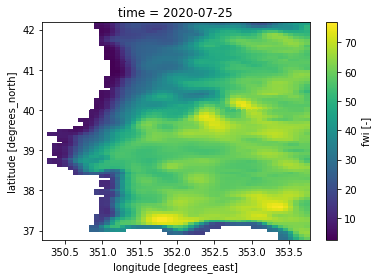

In [3]:
# Open raw RT HRES forecast for Portugal, issued on 16th July 2020 (10 days before the fires)
ds = xr.open_dataset("./eodata/cems_geff/202007_Portugal/rt_hr/ECMWF_FWI_20200716_1200_hr.nc")

# Plot the raw forecast, Day 10
ds.fwi[9].plot();

Let's use the EFFIS thresholds

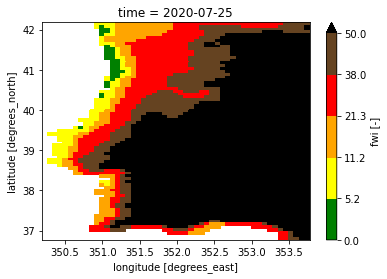

In [4]:
# Plot the re-classified forecast, Day 10
ds.fwi[9].plot(levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
               colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
               label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme']);

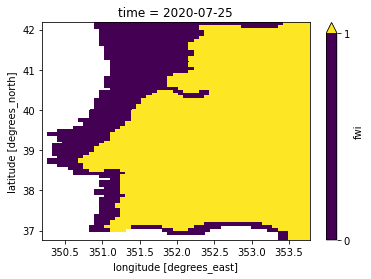

In [5]:
# Highlight only cells above Very High danger
ds_vh = xr.where(cond = ds < 38.0, x = 0, y = ds)
ds_vh.fwi[9].plot(levels = [0, 1]);

# Other danger indicators

Given the different climatic conditions in Europe, EFFIS also publishes two indicators that provide information on the local/temporal variability of the FWI compared to a historical series of approximately 30 years. These indicators are: (a) the **ranking**, which provides percentiles of occurrence of the values, and (b) the **anomaly**, computed as a standard deviation from the historical mean values. More advanced tutorials will look at anomaly and ranking.

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./61_CEMS_GEFF_FWI_data_overview.ipynb"><< 61 - CEMS GEFF FWI data overview </a><span style="float:right;"><a href="./63_CEMS_GEFF_FWI_custom_danger_classes.ipynb">63 - CEMS GEFF FWI custom danger classes >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.